In [19]:
# ready
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# vusualize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import probscale

plt.style.use('seaborn')
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
# percentile plot 을 그리기 위해서 probscale 을 install 하고 import 했다.

### Load data

In [3]:
db_score = pd.read_excel('data/db_score.xlsx')
db_score.head()

,sno,attendance,homework,discussion,midterm,final,score,grade
0,1,7.73,19.37,0,35.00,30.10,92.20,A
1,2,7.73,20.00,0,34.12,30.10,91.95,A
2,3,7.73,19.37,0,34.30,29.75,91.15,A
3,4,8.00,18.12,2,31.50,29.05,88.67,A
4,5,8.00,20.00,2,33.25,21.35,84.60,A


### HW
#### db_score.xlsx 데이터의 모든 애트리뷰트에 대하여 다음의 결과를 출력하되, python 으로 구현하라.

(1) mean, median (grade 제외)

In [4]:
def mean_median(data):
    cols = []
    means = []
    medians = []
    
    for col in data.columns[data.columns != 'grade']:
        cols.append(col)
        means.append(np.mean(data[col]))
        medians.append(np.median(data[col]))
        
    return pd.DataFrame({'mean':means,'median':medians},index=cols)

In [5]:
mean_median(db_score)

,mean,median
sno,46.500000,46.500
attendance,7.804130,8.000
homework,18.291522,19.370
discussion,0.239130,0.000
midterm,23.560978,24.500
final,14.148370,13.650
score,64.044130,67.585


(2) mode (grade 만)

In [6]:
print(db_score['grade'].mode())
print(db_score['grade'].value_counts())

0    A
1    B
2    C
3    D
dtype: object
C    20
B    20
A    20
D    20
F    12
Name: grade, dtype: int64


최빈값이 20번씩 나온 A,B,C,D이다.

(3) variance, standard deviation AAD, MAD (grade 제외)

In [17]:
def MAD(data):
    MADs = []
    cols = []
    
    for col in data.columns[data.columns != 'grade']:
        MAD = np.median(np.absolute(data[col]-np.median(data[col],axis=0)),axis=0)
        cols.append(col)
        MADs.append(MAD)
    
    return pd.DataFrame(MADs,index = cols,columns=['median absolute deviation'])


def spread(data):
    # variance
    var = (data.std())**2
    # sd
    sd = data.std()
    # AAD
    aad = data.mad()     # mean absolute deviation
    # MAD
    mad = MAD(data)
    
    # total
    total = pd.DataFrame({'variance':var,'standard deviation':sd,
                        'absolute average dedivation':aad})
    
    return pd.concat([total,mad],axis=1)

In [18]:
spread(db_score)

,variance,standard deviation,absolute average dedivation,median absolute deviation
sno,713.000000,26.702060,23.000000,23.000
attendance,0.122901,0.350573,0.221418,0.000
homework,7.708075,2.776342,1.618819,0.625
discussion,0.425705,0.652461,0.421078,0.000
midterm,62.998161,7.937138,6.160808,5.250
final,60.569475,7.782639,6.272212,5.600
score,231.293312,15.208330,11.691163,8.775


(4) percentile plot (grade 제외)

In [20]:
def percentile_plot(data):
    for col in data.columns[data.columns != 'grade']:
        fig, ax = plt.subplots(figsize=(6, 3))
        fig = probscale.probplot(data[col], ax=ax, plottype='pp',
                                 problabel='Percentile', datalabel=col,
                                 scatter_kws=dict(marker='.', linestyle='none', label=col))
        ax.set_ylim(bottom=1, top=100)
        plt.show()

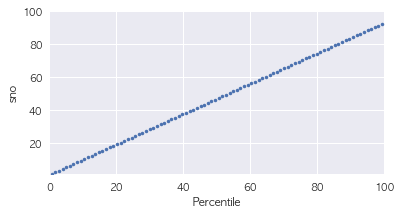

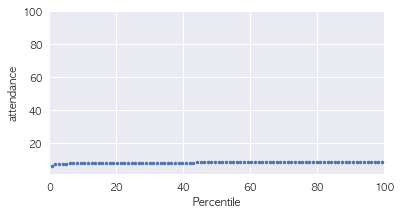

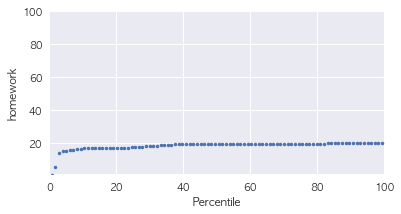

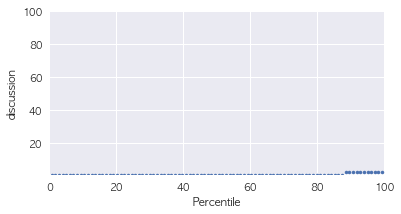

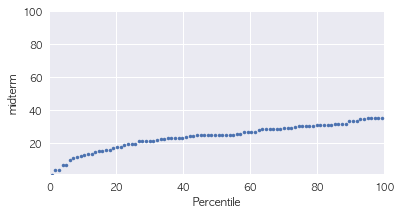

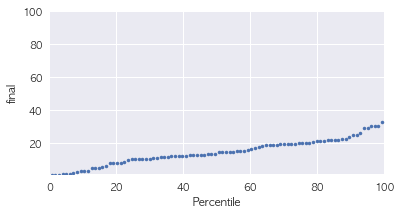

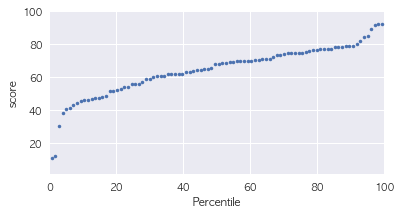

In [21]:
percentile_plot(db_score)

(5) boxplot (grade 제외)

<Figure size 2160x720 with 0 Axes>

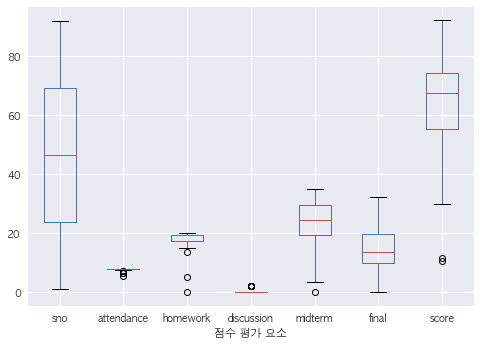

In [45]:
plt.figure(figsize=(30,10))

db_score.plot.box()
plt.xlabel('점수 평가 요소')
plt.show()

(6) histogram (모든 attribute)

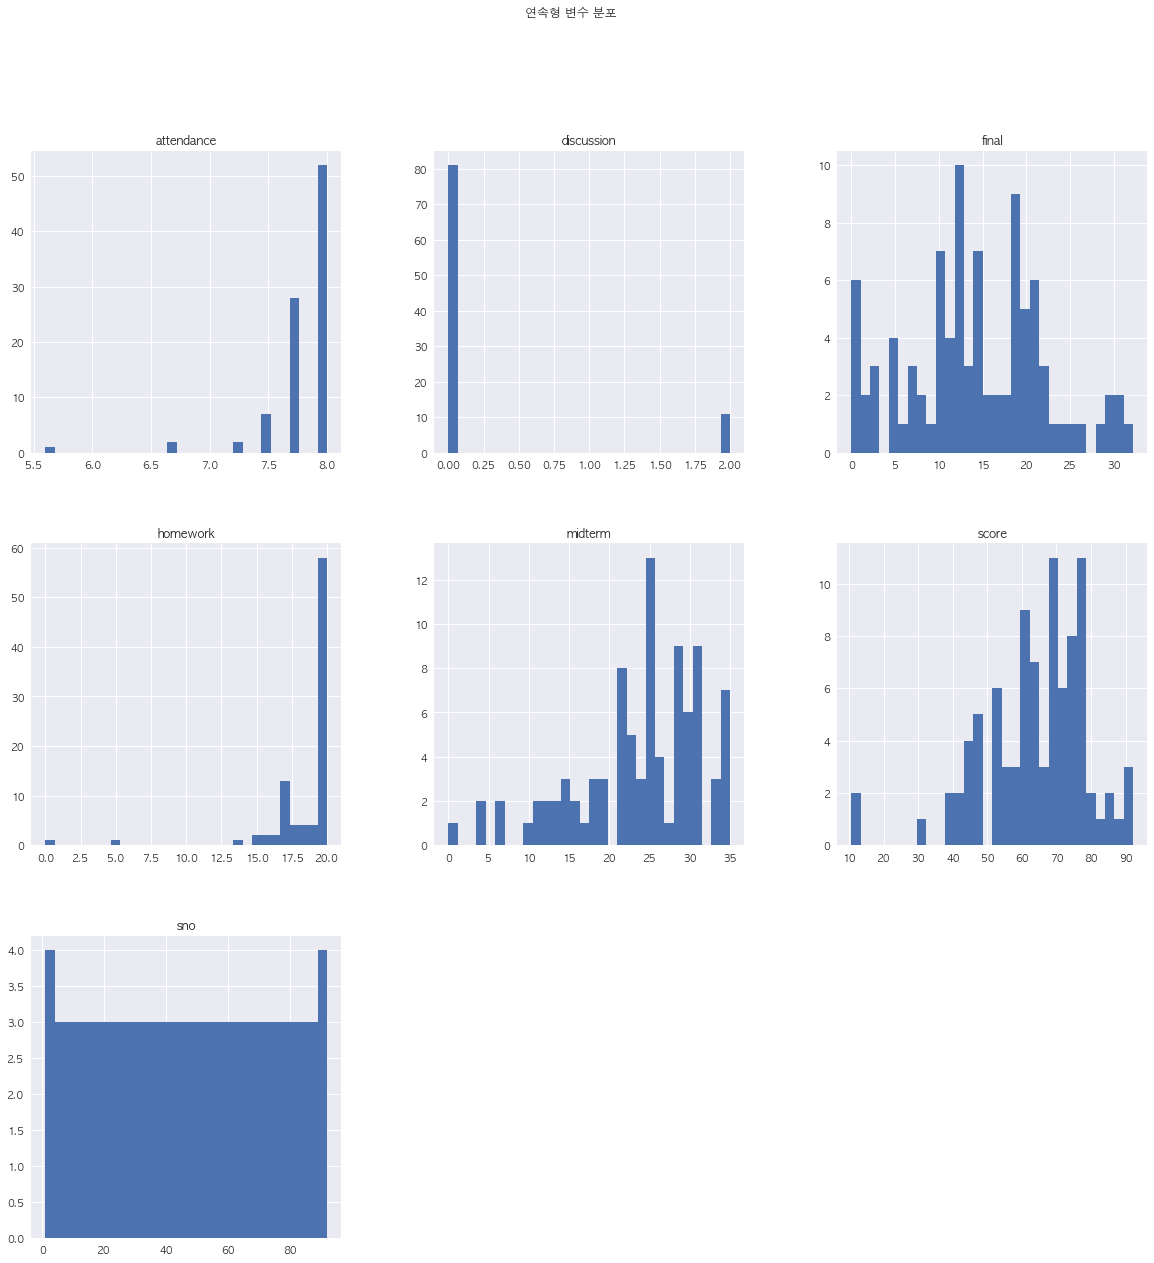

In [49]:
# 모든 연속형 변수의 분포를 histogram 으로 확인
db_score.hist(bins=30, figsize=(20,20))
plt.suptitle('연속형 변수 분포', ha = 'center', fontsize='large')
plt.show()

학번이 0번 부터 시작하고 92까지 있기 때문에 0 막대와, 90 막대가 더 길다

(7) scatter plot (grade 제외, 모든 가능한 attribute 조합에 대하여 그릴 것)

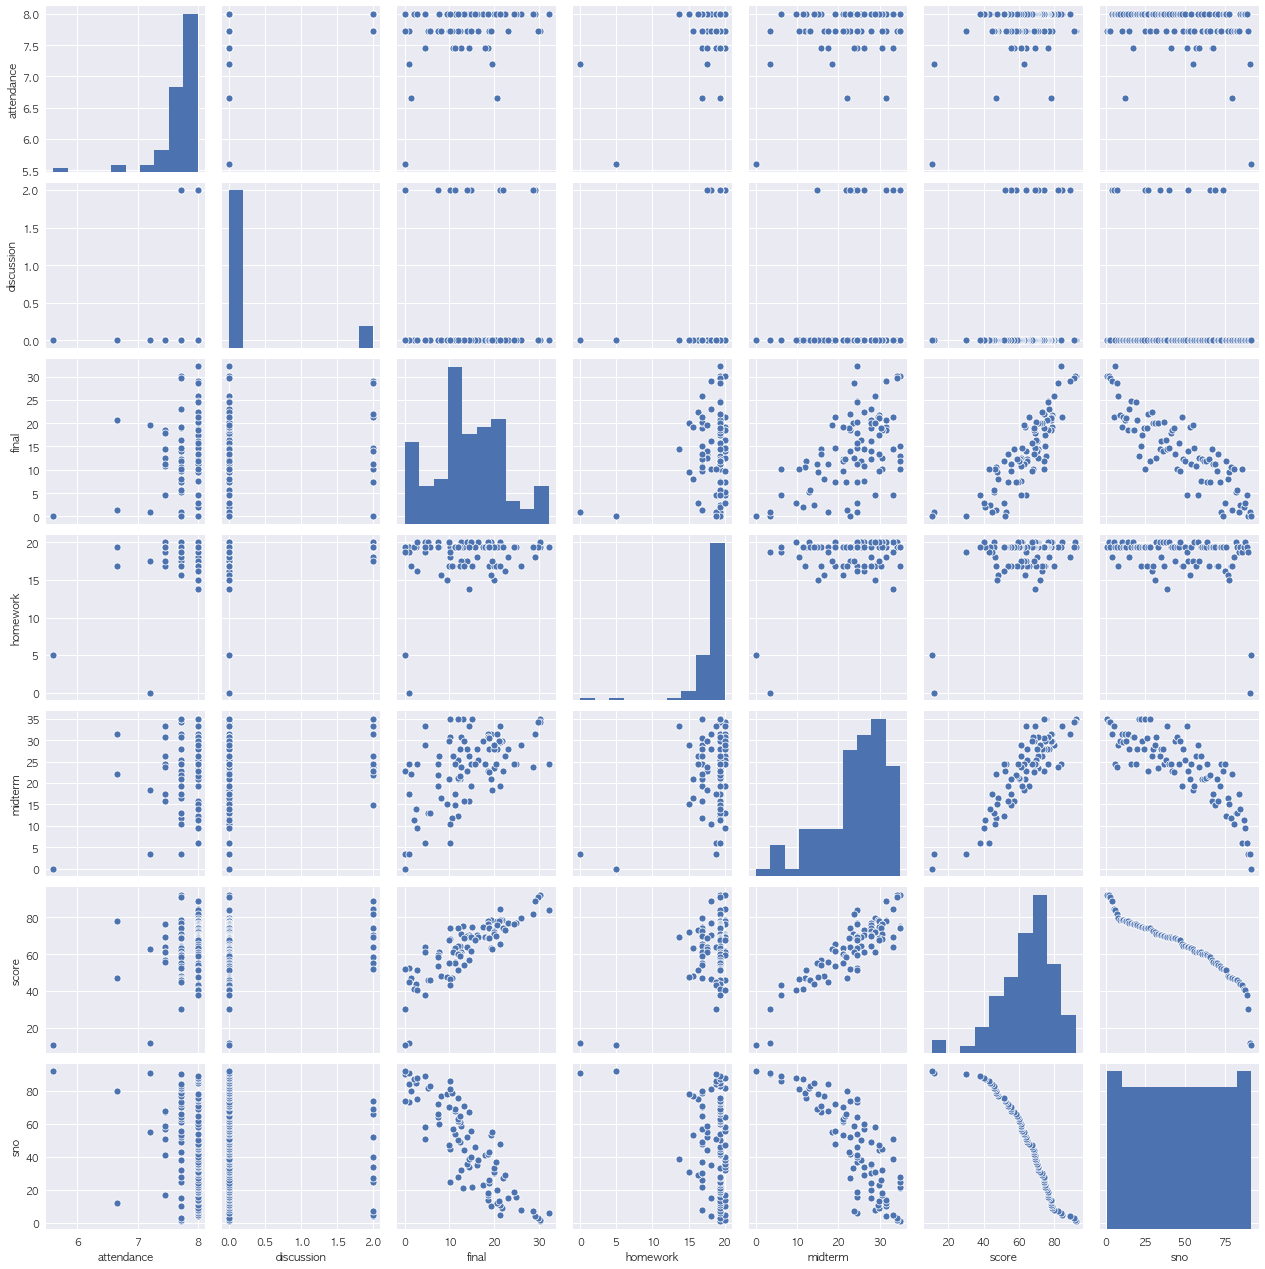

In [56]:
# grade 제외한 모든 조합의 scatter plot
sns.pairplot(db_score[db_score.columns.difference(['grade'])])